# IMPORT LIBRARIES and DATASET

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk

from src.data_viz_functions import plot_bar, plot_word_cloud, plot_top_n_words, plot_word_length_distribution
from src.data_viz_functions import sentiment_analysis, plot_sentiment_distribution, plot_top_n_ngrams

In [2]:
df = pd.read_csv('Data/chatgpt_reviews.csv', sep=',')

df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,8d23ba1a-8455-4ea5-bbcd-47c6b00dd8eb,Dike Sina,Best Ai ever ❤️,5,0,1.2024.143,2024-06-05 22:27:21,1.2024.143
1,b4374835-e711-4ea8-a009-20cd45597d64,Oil Wealth,good app,5,0,1.2024.151,2024-06-05 22:26:17,1.2024.151
2,d97a7ab9-10be-40ae-a3c3-3e92a83b0659,Mojtaba farahani,Good luck 💙,5,0,1.2024.151,2024-06-05 22:17:37,1.2024.151
3,03be92f7-084a-4bac-9131-c59e7ca61ca6,Michael Chisonum,so nice,1,0,1.2024.143,2024-06-05 22:10:59,1.2024.143
4,18cfaae5-3bd6-4862-b161-5afc3adf5c2d,Zamir Rahmani,Not too much creative really makes me feel bor...,4,0,1.2024.151,2024-06-05 22:10:10,1.2024.151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137132 entries, 0 to 137131
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              137132 non-null  object
 1   userName              137131 non-null  object
 2   content               137128 non-null  object
 3   score                 137132 non-null  int64 
 4   thumbsUpCount         137132 non-null  int64 
 5   reviewCreatedVersion  125859 non-null  object
 6   at                    137132 non-null  object
 7   appVersion            125859 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.4+ MB


In [4]:
df.describe()

,score,thumbsUpCount
count,137132.000000,137132.000000
mean,4.497258,0.521461
std,1.090049,12.580185
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,1193.000000


In [5]:
df['score'].value_counts(), df['thumbsUpCount'].value_counts()

(score
 5    104367
 4     16129
 1      8611
 3      5706
 2      2319
 Name: count, dtype: int64,
 thumbsUpCount
 0      132095
 1        2901
 2         695
 3         294
 4         148
         ...  
 447         1
 881         1
 277         1
 231         1
 93          1
 Name: count, Length: 228, dtype: int64)

# DATA CLEANING

In [6]:
# Check for duplicate rows in df_train
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = sum(duplicate_rows)

if num_duplicate_rows > 0:
    print(f"There are {num_duplicate_rows} duplicate rows in df_train.")
    df_cleaned = df.drop_duplicates()
    print('Dropped!')
else:
    print("There are no duplicate rows in df_train.")

There are 2509 duplicate rows in df_train.
Dropped!


In [7]:
# Check nan values

df_cleaned.isna().sum()

reviewId                    0
userName                    1
content                     4
score                       0
thumbsUpCount               0
reviewCreatedVersion    11143
at                          0
appVersion              11143
dtype: int64

In [8]:
# Drop only 'content' and 'userName' NaN rows

df_cleaned = df_cleaned.dropna(subset=['content', 'userName'])

df_cleaned.isna().sum()

reviewId                    0
userName                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    11143
at                          0
appVersion              11143
dtype: int64

# DATA VISUALIZATION

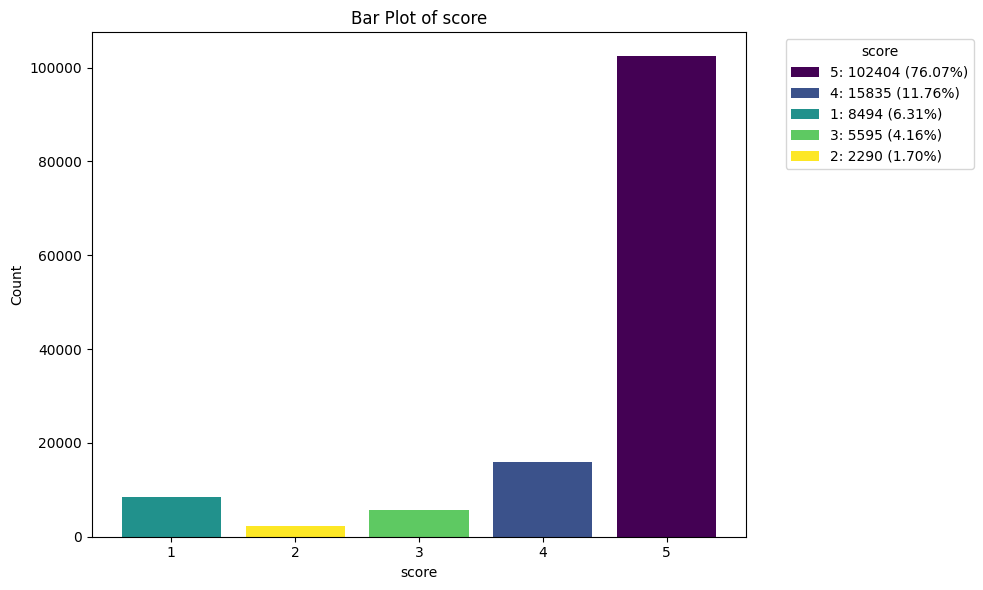

In [9]:
# Bar plot for 'score' target feature

plot_bar(df_cleaned, 'score', num_bars_max=None)

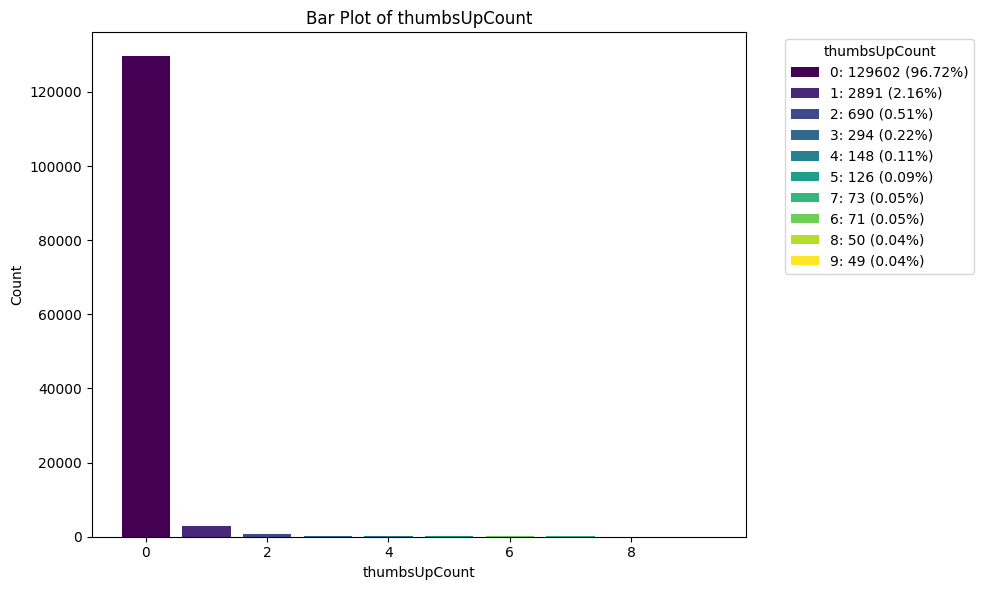

In [10]:
# Bar plot for N 'thumbsUpCount' values

plot_bar(df_cleaned, 'thumbsUpCount', num_bars_max=10)

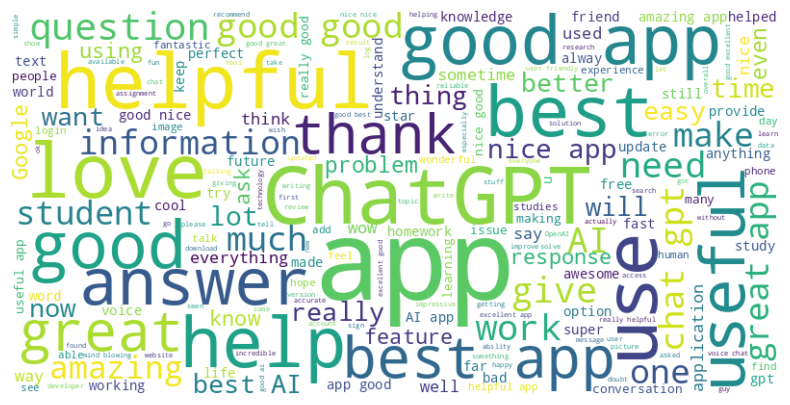

In [11]:
# Word Cloud
# This visualizes the most common words in the text data, with the size of each word indicating its frequency.

all_text = ' '.join(df_cleaned['content'].dropna())
plot_word_cloud(all_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/silvanoquarto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silvanoquarto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


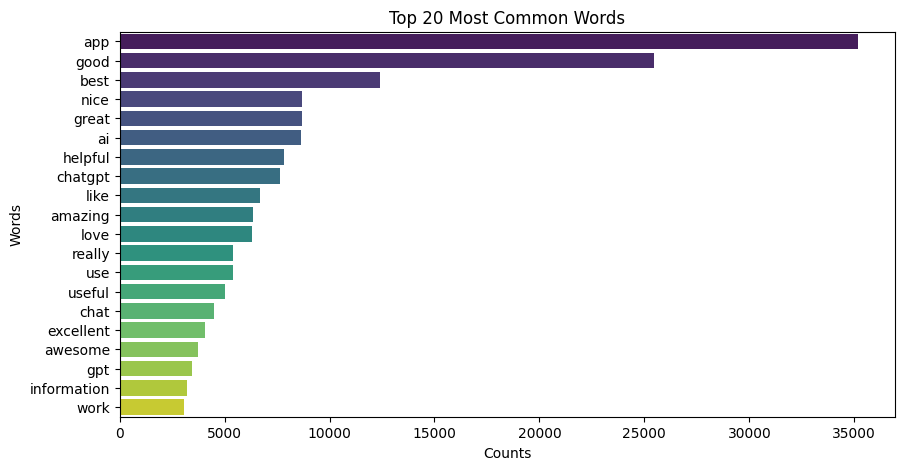

In [12]:
# Bar Plot of Top N Words
# Similar to the word cloud but in a bar chart format, showing the top N most frequent words.

nltk.download('punkt')
nltk.download('stopwords')

all_text = ' '.join(df_cleaned['content'].dropna())
plot_top_n_words(all_text)

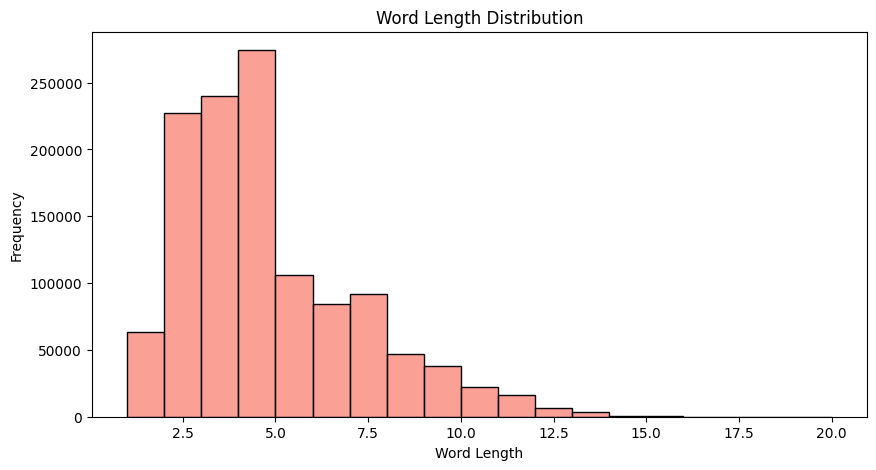

In [13]:
# Frequency Distribution of Word Length
# A histogram showing the distribution of word lengths.

all_text = ' '.join(df_cleaned['content'].dropna())
plot_word_length_distribution(all_text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/silvanoquarto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


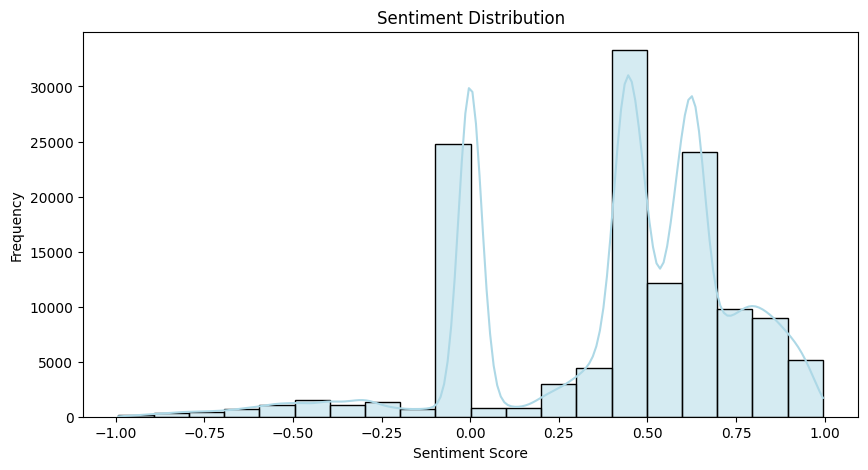

In [14]:
# Sentiment Analysis Plot
# If you perform sentiment analysis, you can visualize the distribution of sentiment scores (positive, negative, neutral).
# To perform sentiment analysis, you would first need to analyze the sentiments of the text data. 
# One popular library for this is VADER (Valence Aware Dictionary and sEntiment Reasoner).

nltk.download('vader_lexicon')

df_sentiment = df_cleaned.copy()
df_sentiment = sentiment_analysis(df_cleaned)
plot_sentiment_distribution(df_sentiment)


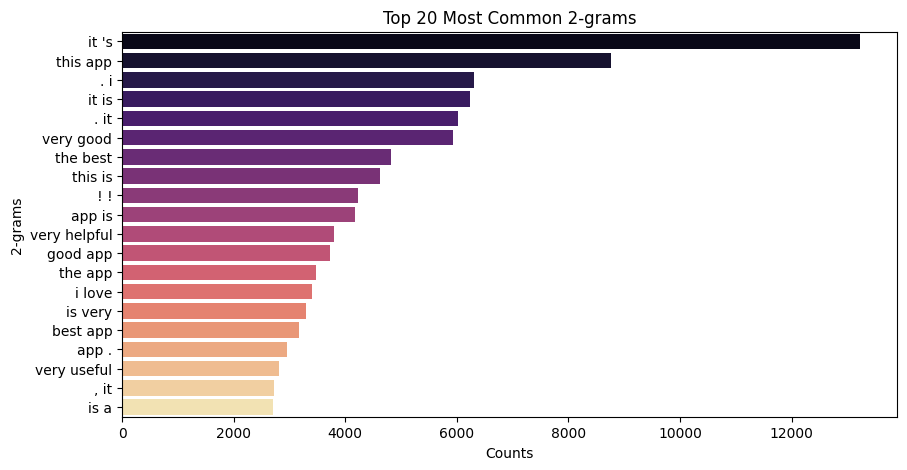

In [15]:
# N-gram Analysis
# Visualizes the most common bi-grams or tri-grams (pairs or triplets of words) in the text data.

# n = 2 for bigrams
all_text = ' '.join(df_cleaned['content'].dropna())
plot_top_n_ngrams(all_text, n=2, top_k=20)  


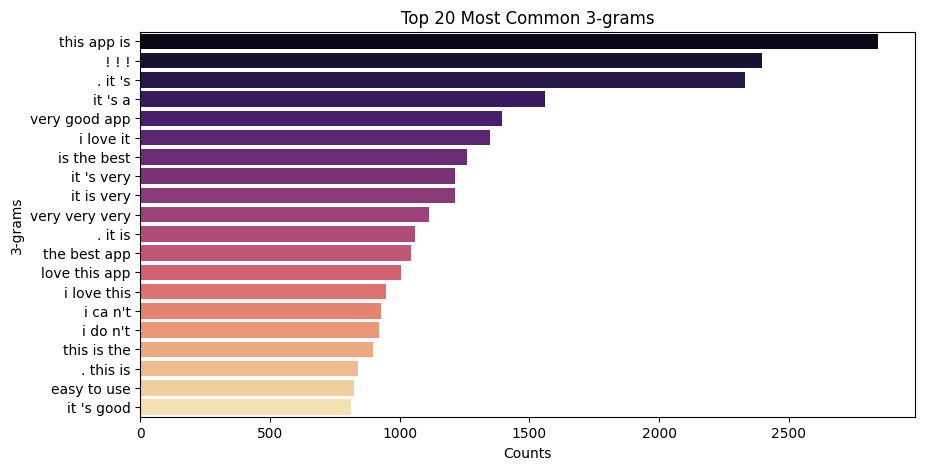

In [16]:
# N-gram Analysis

# n = 3 for trigrams
all_text = ' '.join(df_cleaned['content'].dropna())
plot_top_n_ngrams(all_text, n=3, top_k=20)  